<a href="https://colab.research.google.com/github/JINSUNGWOO/section4/blob/main/ai_sc41x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## AI SC41x

---
# Sprint Challenge - 신경망(Neural Network) 기본기 다지기

Table of Problems

1. 신경망 정의하기 
2. 퍼셉트론 정의
    - 퍼셉트론(Perceptron)
    - 다층 퍼셉트론(Multilayer Perceptron)
    - 분석과 비교
4. Keras 사용하기

<a id="Q1"></a>
## 1. 신경망 용어 정의
### 1.1 아래에 주어진 신경망 개념에 사용 되는 용어들을 자신만의 언어로 정의해보세요
꼭 "자신의 언어"로 써보시고, 정리해보고, 요약해보세요 :)

- **Neuron:** 데이터의 연산 및 저장, 출력 등이 가능한 기본단위
- **Input Layer:** 입력층, 데이터를 입력시키는 곳(차원 포함X)
- **Hidden Layer:** 은닉층, 가중치와 편향을 사용하여 데이터의 연산이 이루어지는곳
- **Output Layer:** 출력층, 은닉층에서 연산이 끝난 데이터를 출력함
- **Activation Function:** 활성함수, 연산에 사용될 함수
- **Back Propagation:** 역전파, 순전파로 연산이 끝난 데이터를 역순으로 계산하여 가중치와 편향을 재조정하는 기법으로 모델의 성능을 올릴 수 있다.

### 1.2 역전파 설명해보기
이번에는 역전파 (Back Propagation)를 조금 더 디테일하게 설명해보겠습니다. 
<br> <b>초등학생</b>에게 설명한다는 생각으로 단어들을 선정해 주세요. <i>외부 자료나 이미지를 설명에 활용하셔도 좋습니다</i>.

엄마가 계란말이를 만들어주는데 소금이랑 후추에 당근을 많이 사용하셔,
너는 설탕과 쪽파, 치즈가 들어간 계란말이를 좋아하는데 말이야.
- 순전파

오늘은 원래의 계란말이가 먹기싫어서 남겼더니, 엄마는 생각하시겠지.

'소금, 후추등의 양은 줄이고 설탕과 치즈의 양은 늘려야겠다!'
- 역전파

이전과 다른 계란말이에 넌 더 행복해지고, 엄마도 앞으로는 지금의 계란말이를 자주 해주시겠지?
😸


### 1.3 퍼셉트론 정의해보기
신경망 수업 첫날에 들었었던 퍼셉트론의 간단한 개념으로 예측하는 과정을 설명해보세요. <br> <b>입력</b>에서 <b>출력</b>으로 어떻게 변경되는 지 단계별로 설명해보세요.

입력: 데이터를 입력받는다(단순히 입력만 받고 연산등의 작업은 수행되지 않는다.) -> 입력받은 데이터를 가지고 각 노드(은닉층)를 지날때마다 가중치와 활성화함수의 연산 등을 반복실행한다. -> 출력층에서 계산된 값을 출력한다.

<a id="Q2"></a>
## 2. 단순 퍼셉트론

이번에는 TensorFlow, keras를 사용하여 두 개의 신경망을 직접 구축한 뒤,
<br> 아래 임의로 제공 된 $X, y$를 이용하여 두 모델에 적용한 뒤 결과를 비교해보세요. 
먼저 사용할 데이터는 다음과 같습니다.

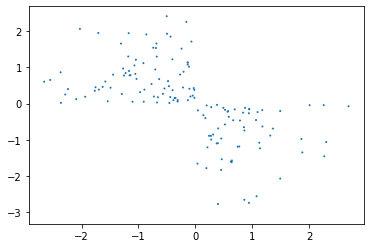

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)


"model1과 model2를 구축할 때 아래의 X & y를 사용하세요"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

plt.scatter(X[:,0], X[:,1], s=y)


### 단순 퍼셉트론 구현
Keras로 <b>sigmoid activation function</b>을 포함한 dense layer 1개가 있는</b> `model1`을 만들어 학습시키고 `h1`에 저장하세요.

In [16]:
import tensorflow as tf

model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

h1 = model1.fit(X,y, epochs=20)

Epoch 1/20
10/10 [==============================] - 0s 2ms/step - loss: 0.7356 - accuracy: 0.5700
Epoch 2/20
10/10 [==============================] - 0s 2ms/step - loss: 0.7338 - accuracy: 0.5667
Epoch 3/20
10/10 [==============================] - 0s 1ms/step - loss: 0.7321 - accuracy: 0.5767
Epoch 4/20
10/10 [==============================] - 0s 2ms/step - loss: 0.7304 - accuracy: 0.5833
Epoch 5/20
10/10 [==============================] - 0s 2ms/step - loss: 0.7286 - accuracy: 0.5833
Epoch 6/20
10/10 [==============================] - 0s 3ms/step - loss: 0.7270 - accuracy: 0.5800
Epoch 7/20
10/10 [==============================] - 0s 2ms/step - loss: 0.7254 - accuracy: 0.5800
Epoch 8/20
10/10 [==============================] - 0s 2ms/step - loss: 0.7239 - accuracy: 0.5867
Epoch 9/20
10/10 [==============================] - 0s 2ms/step - loss: 0.7223 - accuracy: 0.5900
Epoch 10/20
10/10 [==============================] - 0s 2ms/step - loss: 0.7209 - accuracy: 0.5900
Epoch 11/20
10/10 [


### Multi-Layer Perceptron (MLP)
이번에는 여러층의 레이어들을 쌓은 MLP 모델을 만들어보겠습니다. 아래는 간략한 가이드입니다 :
- 2개의 은닉층 (출력 수를 맞추는 것까지 3개의 Dense를 사용할 것은 추천)
- 노드의 개수는 8-32개 내에서 변경해서 사용해보세요.
- Activation function과 optimizer는 이번 주에 배운 것들 중에서 자유롭게 골라보세요.
- 아래 만들어진 Callback function을 모델에 통합해서 사용하세요

MLP로 만들어진 `model2` 를 만들어 학습하고 `h2`에 저장하세요.

In [3]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .90):   
            self.model.stop_training = True

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model2 = Sequential([
    Dense(24, activation='sigmoid', input_dim=2),
    Dense(16, activation='sigmoid'), 
    Dense(2, activation='softmax') 
])

model2.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

h2 = model2.fit(X,y, epochs=50, callbacks=myCallback())

Epoch 1/50
10/10 [==============================] - 0s 2ms/step - loss: 1.2549 - accuracy: 0.5267
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 1.1259 - accuracy: 0.5267
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0120 - accuracy: 0.5267
Epoch 4/50
10/10 [==============================] - 0s 1ms/step - loss: 0.9136 - accuracy: 0.5267
Epoch 5/50
10/10 [==============================] - 0s 1ms/step - loss: 0.8360 - accuracy: 0.5267
Epoch 6/50
10/10 [==============================] - 0s 1ms/step - loss: 0.7789 - accuracy: 0.5267
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7364 - accuracy: 0.5267
Epoch 8/50
10/10 [==============================] - 0s 1ms/step - loss: 0.7130 - accuracy: 0.5267
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7005 - accuracy: 0.5267
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5267
Epoch 11/50
10/10 [

### Analyze and Compare

코드를 시작하기 전에 추가 라이브러리를 설치해야 합니다. 스프린트 과제에 사용 중인 환경에 패키지 `mlxtend`를 설치합니다. 설치코드를 직접 제작해보세요. 기존 자료들을 참고하면 쉽게 설치할 수 있을 것입니다. 

아래 셀은 모형의 의사결정 경계도("model1" 및 "model2")를 생성합니다. 그림을 검토합니다.

In [5]:
# mlxtend 라이브러리를 설치합니다
!pip install mlxtend

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


ValueError: ignored

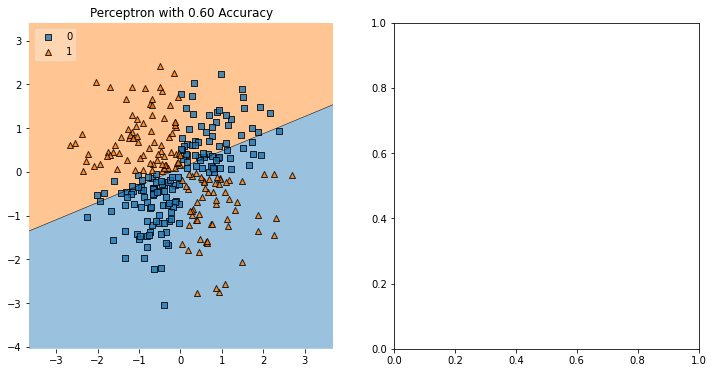

In [17]:
# 이 셀의 코드는 변경하지 마세요

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

#### 대부분의 Perceptron("model1")의 정확도가 50-70% 정도로 나오실 것인데요, 왜 그것밖에 되지 않을까요? <br> 데이터 X와 레이블 y의 관계를 보다 정확하게 학습할 수 있는 다층 퍼셉트론의 구조적인 특징은 무엇일까요? (설명을 하실 때 우리가 배웠었던 특징 추출의 관점에서 설명을 해보시길 바랍니다.)

개발자가 하이퍼파라미터를 설정해주지 않아서.

학습률 스케쥴링을 통해 최적값을 찾을 확률을 높일 수 있으며,
가중치 초기화를 사용하여 표현력을 높여 비전공자에게 보다 더 나은 설명을 해줄 수 있다.

다층 퍼셉트론의 경우, 다양한 하이퍼파라미터를 통해 특징 추출을 잘할 수 있도록 기존의 가중치를 업데이트하는 역전파를 사용할 수 있다.

## 3. Keras MLP 튜닝

이번에는 Keras 라이브러리를 사용하여 선택한 MultiLayer Perceptron(MLP) 아키텍처를 구현해보겠습니다. 극히 단순한 모델부터 복잡한 모델까지 만들어 보실 수 있습니다. 모델을 학습하고 정확도를 구해보세요. 
<br> 그런 다음 최소 <b>두 개</b>의 파라미터를 튜닝한 후에 다시 모형의 정확도를 구해보고 이전 모델과 비교해보세요. 
<br> 아래 Cell에서 심장병 데이터 세트를 불러 온 후 이진 분류 모델 (binary classification model) 을 만들어 보세요. 이진 분류 작업에 적절한 손실 함수를 사용하고, 신경망의 마지막 계층에서 적절한 출력값과 활성화 함수를 사용합니다. 
<br> 세부적인 출력을 사용하여 빠르게 수렴할 수 있도록 모델을 학습해보는 것도 중요합니다. GridSearchCV 또는 RandomSearchCV를 사용하여 모델을 하이퍼 파라미터들을 튜닝해봅니다. (최소 두 개의 하이퍼 파라미터를 튜닝해봅니다) 하이퍼 파라미터 튜닝 시 새로운 각 실험에 대해 코드 셀을 추가하여 작업하는 방법을 배워보았는데, 그대로 이용하지 말고 변형을 해서 보여주고 싶은 내용을 정리해서 보여주세요.  
<br> 테스트할 때 하이퍼 파라미터의 각 조합에 대한 정확도를 보고하여 가장 높은 정확도를 얻을 수 있는 결과를 쉽게 확인할 수 있도록 합니다. 
<br> 이 SC에서 **3점**을 얻으려면 **최소 3개의 파라미터**를 조정해야 합니다.

- BatchNormalization을 레이어에 추가하면 성능이 많이 오를 수 있습니다. 
- 하지만 BatchNormalization을 사용하기 위해서는 Batch_size 옵션을 추가해야 합니다.

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()


(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3,0
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3,0


In [19]:
df_summary = pd.concat((df.dtypes,df.isnull().sum()),axis=1)
df_summary

,0,1
age,int64,0
sex,int64,0
cp,int64,0
trestbps,int64,0
chol,int64,0
fbs,int64,0
restecg,int64,0
thalach,int64,0
exang,int64,0
oldpeak,float64,0


In [21]:
model3 = Sequential([
    Dense(16, activation='relu', input_shape=(303,14)),
    Dense(16, activation='relu'), 
    Dense(1, activation='sigmoid') 
])

model2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

h2 = model2.fit(X,y, epochs=50, callbacks=myCallback())

Epoch 1/50


ValueError: ignored